In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline    

In [2]:
df_index=pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df_index.drop(columns=["Unnamed: 0","month","year"],axis=1,inplace=True)


In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
# Check for null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

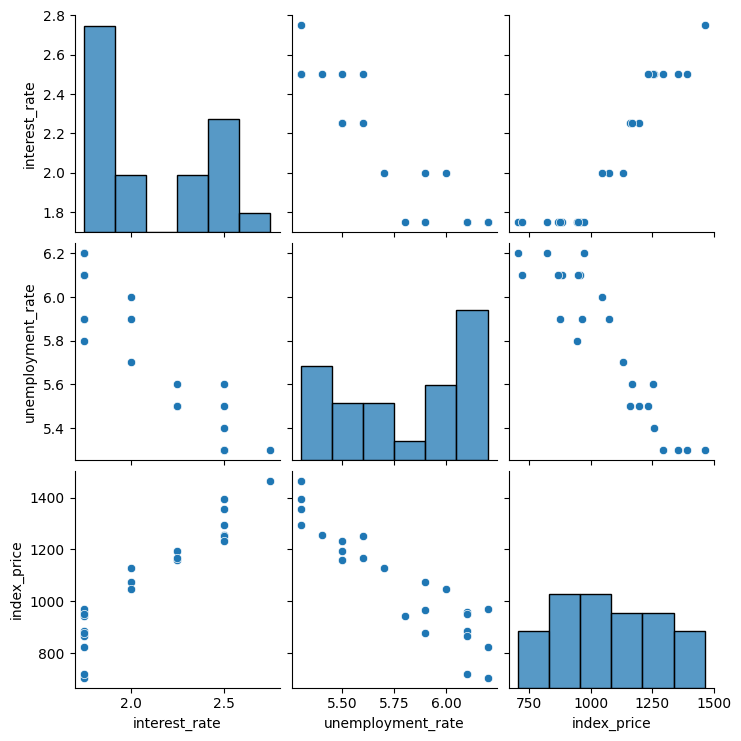

In [7]:
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

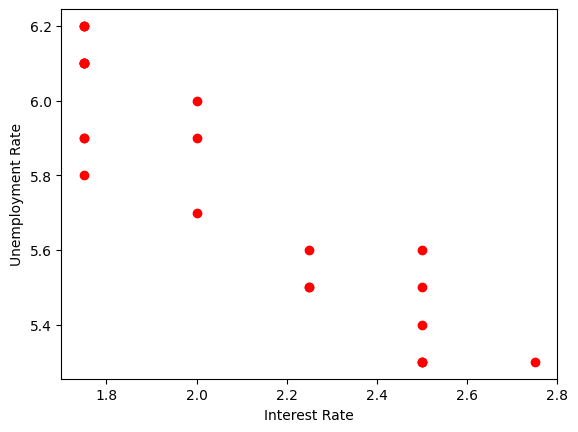

In [11]:
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color="r")
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [19]:
# Seperate independent and dependent features
X = df_index[['interest_rate','unemployment_rate']]
y = df_index['index_price']

In [23]:
# Split the training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [29]:
# Cross validation 
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(model,X_train,y_train,scoring="neg_mean_squared_error",cv=3)
print(np.mean(validation_score))

-5674.031667186763


In [30]:
y_pred = model.predict(X_test)
print(y_pred)

[1204.14403741  821.62603274 1406.38534684  857.68137178  994.85736555]


In [40]:
# Coefficient and Intercept of the model
print("Coefficients or slopes of the model:",model.coef_)
print("Intercept of the model:",model.intercept_)

Coefficients or slopes of the model: [  86.63351334 -114.04857249]
Intercept of the model: 1059.4210526315792


In [31]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)

MSE: 6957.105303258833
MAE: 71.71878409976625
RMSE: 83.40926389351985


In [34]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("R-squared:",score)

R-squared: 0.8254940547158576


In [35]:
## Adjusted R-squared

adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] - 1)
print("Adjusted R-squared:",adj_score)

Adjusted R-squared: 0.6509881094317151


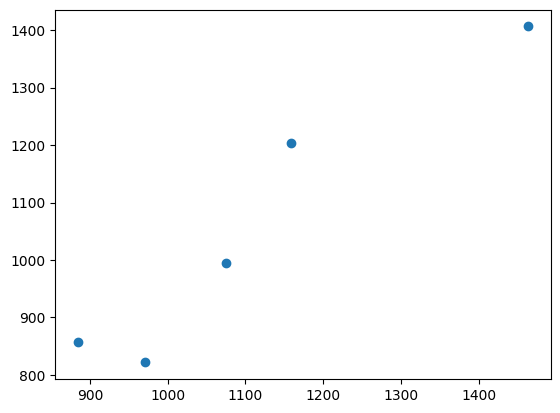

In [36]:
# Assumptions
plt.scatter(y_test,y_pred)

In [37]:
residuals = y_test - y_pred
residuals

8     -45.144037
16    149.373967
0      57.614653
18     26.318628
11     80.142634
Name: index_price, dtype: float64

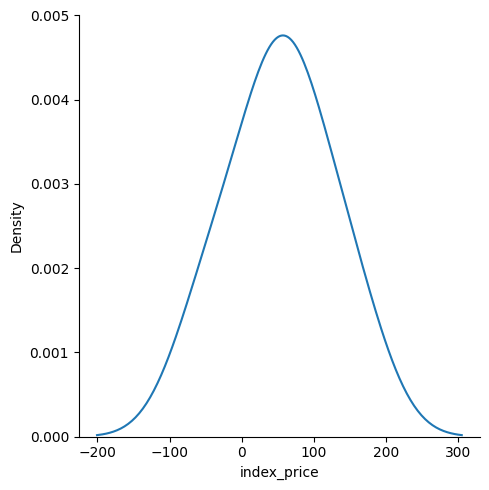

In [38]:
sns.displot(residuals,kind="kde")

In [41]:
import statsmodels.api as sm

model2 = sm.OLS(y_train,X_train).fit()

In [42]:
model2.summary()

/home/glinting-pixie/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Sat, 06 Jul 2024   Prob (F-statistic):                       0.751
Time:                        20:12:51   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.6335    647.232      0.134      0.895   -1278.906    1452.173
x2          -114.0486    647.232     -0.176      0.862   -1479.588    1251.491
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.526
Skew:                          -0.369   Prob(JB):                        0.769
Kurtosis:                       2.656   Cond. No.                         4.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""